### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [3]:
import tensorflow as tf
#tf.set_random_seed(42)

In [4]:
import matplotlib.pyplot as plt

In [5]:
tf.__version__

'2.0.0'

In [6]:
tf.keras.__version__

'2.2.4-tf'

### Collect Data

In [7]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

In [8]:
print(testY[0:5])

[9 2 1 1 6]


In [9]:
trainX.shape

(60000, 28, 28)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [10]:
trainY =  tf.keras.utils.to_categorical(trainY)

In [11]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [12]:
testY =  tf.keras.utils.to_categorical(testY)

In [13]:
print(testY.shape)
print('First 5 examples now are: ', testY[0:5])

(10000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

C:\Users\swathi\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


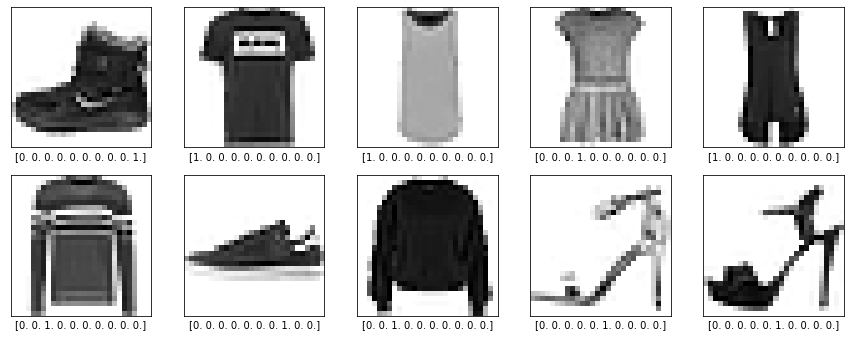

In [14]:
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(trainY[i])
plt.show()
    
    

# Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [15]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Reshape((784,), input_shape=(28, 28, )))

# Adding first hidden layer
model.add(tf.keras.layers.Dense(784, activation = 'sigmoid'))

# Adding output layer
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))


In [16]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [17]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 245us/sample - loss: 0.6742 - accuracy: 0.7661 - val_loss: 0.6124 - val_accuracy: 0.7777
Epoch 2/10
60000/60000 [==============================] - 14s 230us/sample - loss: 0.5786 - accuracy: 0.7944 - val_loss: 0.5845 - val_accuracy: 0.7911
Epoch 3/10
60000/60000 [==============================] - 14s 230us/sample - loss: 0.5553 - accuracy: 0.8035 - val_loss: 0.5920 - val_accuracy: 0.7953
Epoch 4/10
60000/60000 [==============================] - 13s 223us/sample - loss: 0.5425 - accuracy: 0.8064 - val_loss: 0.5644 - val_accuracy: 0.8009
Epoch 5/10
60000/60000 [==============================] - 15s 244us/sample - loss: 0.5442 - accuracy: 0.8086 - val_loss: 0.5607 - val_accuracy: 0.8056
Epoch 6/10
60000/60000 [==============================] - 15s 243us/sample - loss: 0.5403 - accuracy: 0.8067 - val_loss: 0.5720 - val_accuracy: 0.7876
Epoch 7/10
60000/60000 [====================

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [18]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Reshape((784,), input_shape=(28, 28, )))

model.add(tf.keras.layers.BatchNormalization())

# Adding first hidden layer
model.add(tf.keras.layers.Dense(784, activation = 'sigmoid'))

# Adding output layer
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))


In [19]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [20]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 23s 381us/sample - loss: 0.7314 - accuracy: 0.7607 - val_loss: 0.5601 - val_accuracy: 0.8024
Epoch 2/10
60000/60000 [==============================] - 20s 329us/sample - loss: 0.5305 - accuracy: 0.8160 - val_loss: 0.5057 - val_accuracy: 0.8172
Epoch 3/10
60000/60000 [==============================] - 25s 420us/sample - loss: 0.4926 - accuracy: 0.8290 - val_loss: 0.4857 - val_accuracy: 0.8269
Epoch 4/10
60000/60000 [==============================] - 29s 490us/sample - loss: 0.4717 - accuracy: 0.8339 - val_loss: 0.4634 - val_accuracy: 0.8351
Epoch 5/10
60000/60000 [==============================] - 28s 467us/sample - loss: 0.4559 - accuracy: 0.8406 - val_loss: 0.4595 - val_accuracy: 0.8339
Epoch 6/10
60000/60000 [==============================] - 24s 400us/sample - loss: 0.4454 - accuracy: 0.8433 - val_loss: 0.4461 - val_accuracy: 0.8380
Epoch 7/10
60000/60000 [====================

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [21]:
sgd = tf.keras.optimizers.SGD(lr = 0.001)
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 360us/sample - loss: 0.4107 - accuracy: 0.8544 - val_loss: 0.4213 - val_accuracy: 0.8465
Epoch 2/10
60000/60000 [==============================] - 23s 389us/sample - loss: 0.4051 - accuracy: 0.8576 - val_loss: 0.4215 - val_accuracy: 0.8492
Epoch 3/10
60000/60000 [==============================] - 24s 402us/sample - loss: 0.3993 - accuracy: 0.8586 - val_loss: 0.4135 - val_accuracy: 0.8502
Epoch 4/10
60000/60000 [==============================] - 22s 369us/sample - loss: 0.3976 - accuracy: 0.8599 - val_loss: 0.4112 - val_accuracy: 0.8506
Epoch 5/10
60000/60000 [==============================] - 22s 361us/sample - loss: 0.3908 - accuracy: 0.8620 - val_loss: 0.4117 - val_accuracy: 0.8518
Epoch 6/10
60000/60000 [==============================] - 21s 346us/sample - loss: 0.3869 - accuracy: 0.8632 - val_loss: 0.4059 - val_accuracy: 0.8514
Epoch 7/10
60000/60000 [====================

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [23]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Reshape((784, ), input_shape = (28, 28, )))

model.add(tf.keras.layers.BatchNormalization())

sgd = tf.keras.optimizers.SGD(lr = 0.03)

#Adding first hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Adding second hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Adding output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [24]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [26]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 120us/sample - loss: 1.5641 - accuracy: 0.5780 - val_loss: 1.0660 - val_accuracy: 0.6901
Epoch 2/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.9058 - accuracy: 0.7242 - val_loss: 0.7646 - val_accuracy: 0.7459
Epoch 3/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.7113 - accuracy: 0.7571 - val_loss: 0.6465 - val_accuracy: 0.7721
Epoch 4/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.6242 - accuracy: 0.7800 - val_loss: 0.5853 - val_accuracy: 0.7860
Epoch 5/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.5705 - accuracy: 0.7975 - val_loss: 0.5419 - val_accuracy: 0.8048
Epoch 6/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.5333 - accuracy: 0.8116 - val_loss: 0.5140 - val_accuracy: 0.8168
Epoch 7/10
60000/60000 [==============================]